# **Problem Statement:**

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced package.

# Objective:

To build a model to predict which customer is potentially going to purchase the long term travel package.

# **Data Description:**

- CustomerID: Unique customer ID
- ProdTaken: Product taken flag
- Age: Age of customer
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
- CityTier: City tier
- DurationOfPitch: Duration of pitch by a sales man to customer
- Occupation: Occupation of customer
- Gender: Gender of customer
- NumberOfPersonVisiting: Total number of person came with customer
- NumberOfFollowups: Total number of follow up has been done by sales person after sales pitch
- ProductPitched: Product pitched by sales person
- PreferredPropertyStar: Preferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of trip in a year by customer
- Passport: The customer has passport or not
- PitchSatisfactionScore: Sales pitch satisfactory score
- OwnCar: Customers owns a car flag
- NumberOfChildrenVisiting: Total number of children with age less than 5 visit with customer
- Designation: Designation of customer in current organization
- MonthlyIncome: Gross monthly income of customer

### Let's start by importing necessary libraries

In [1]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

### Load and overview the dataset

In [68]:
#Loading the dataset - sheet_name parameter is used if there are Basicple tabs in the excel file.
data=pd.read_csv("Tourism.csv")

In [69]:
data.head()

,CustomerID,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Super Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Super Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Multi,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Multi,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Multi,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   PreferredLoginDevice     4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

- There are total 20 columns and 4,888 observations in the dataset
- We can see that 8 columns have less than 4,888 non-null values i.e. columns have missing values.

**Check the percentage of missing values in each column**

In [5]:
pd.DataFrame(data={'% of Missing Values':round(data.isna().sum()/data.isna().count()*100,2)})

,% of Missing Values
CustomerID,0.00
ProdTaken,0.00
Age,4.62
PreferredLoginDevice,0.51
CityTier,0.00
DurationOfPitch,5.14
Occupation,0.00
Gender,0.00
NumberOfPersonVisited,0.00
NumberOfFollowups,0.92


- `Age` column has 4.62% missing values out of the total observations.
- `TypeofContact` column has 0.51% missing values out of the total observations.
- `DurationOfPitch` column has 5.14% missing values out of the total observations.
- `NumberOfFollowups` column has 0.92% missing values out of the total observations.
- `PreferredPropertyStar` column has 0.53% missing values out of the total observations.
- `NumberOfTrips` column has 2.86% missing values out of the total observations.
- `NumberOfChildrenVisited` column has 1.35% missing values out of the total observations.
- `MonthlyIncome` column has 4.77% missing values out of the total observations.
- We will impute these values after we split the data into train and test sets.

**Let's check the number of unique values in each column**

In [6]:
data.nunique()

CustomerID                 4888
ProdTaken                     2
Age                          44
PreferredLoginDevice          2
CityTier                      3
DurationOfPitch              34
Occupation                    4
Gender                        3
NumberOfPersonVisited         5
NumberOfFollowups             6
ProductPitched                5
PreferredPropertyStar         3
MaritalStatus                 4
NumberOfTrips                12
Passport                      2
PitchSatisfactionScore        5
OwnCar                        2
NumberOfChildrenVisited       4
Designation                   5
MonthlyIncome              2475
dtype: int64

- We can drop the column - CustomerID as it is unique for each customer and will not add value to the model.
- Most of the variables are categorical except - Age, duration of pitch, monthly income  and number of trips of customers.

In [7]:
#Dropping CustomerID column
data.drop(columns='CustomerID',inplace=True)

**Summary of the data**

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4888.0,0.188216,0.390925,0.0,0.0,0.0,0.0,1.0
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
NumberOfPersonVisited,4888.0,2.905074,0.724891,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.0,3.0,4.0,5.0


- Mean and median of age column are very close to each other i.e. approx 37 and 36 respectively.
- Duration of pitch has some outliers at the right end as 75th percentile value is 20 and max value is 127. We need to explore this further.
- It seems like monthly income has some outliers at both ends. We need to explore this further.
- Number of trips also has some outliers as 75th percentile value is 4 and max value is 22.
- We can see that the target variable - ProdTaken is imbalanced as most of the values are 0. 

**Let's check the count of each unique category in each of the categorical variables.** 

In [9]:
#Making a list of all catrgorical variables 
cat_col=[ 'CityTier','Occupation', 'Gender', 'ProductPitched','MaritalStatus', 'Passport','OwnCar', 'Designation','PreferredLoginDevice']

#Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts(dropna = False))
    print('-'*50)

1    3190
3    1500
2     198
Name: CityTier, dtype: int64
--------------------------------------------------
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
--------------------------------------------------
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
--------------------------------------------------
Multi           1842
Super Deluxe    1732
Standard         742
Deluxe           342
King             230
Name: ProductPitched, dtype: int64
--------------------------------------------------
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
--------------------------------------------------
0    3466
1    1422
Name: Passport, dtype: int64
--------------------------------------------------
1    3032
0    1856
Name: OwnCar, dtype: int64
--------------------------------------------------
Executive         1842
Manager           173

- Free lancer category in occupation column has just 2 entries out of 4,888 observations.
- We can see that Gender has 3 unique values which includes - 'Fe Male' and 'Female'. This must be a data input error, we should replace 'Fe Male' with 'Female'.
- NumberOfPersonVisited equal to 5 has count equal to 3 only.
- Majority of the customers are married.
- Majority of the customers owns a car.

In [10]:
#Replacing 'Fe Male' with 'Female'
data.Gender = data.Gender.replace('Fe Male', 'Female')

In [11]:
#Converting the data type of each categorical variable and discreete variable to 'category'
for column in cat_col:
    data[column]=data[column].astype('category')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ProdTaken                4888 non-null   int64   
 1   Age                      4662 non-null   float64 
 2   PreferredLoginDevice     4863 non-null   category
 3   CityTier                 4888 non-null   category
 4   DurationOfPitch          4637 non-null   float64 
 5   Occupation               4888 non-null   category
 6   Gender                   4888 non-null   category
 7   NumberOfPersonVisited    4888 non-null   int64   
 8   NumberOfFollowups        4843 non-null   float64 
 9   ProductPitched           4888 non-null   category
 10  PreferredPropertyStar    4862 non-null   float64 
 11  MaritalStatus            4888 non-null   category
 12  NumberOfTrips            4748 non-null   float64 
 13  Passport                 4888 non-null   category
 14  PitchSat

# EDA

## Univariate Analysis

In [13]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,15), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    print(f"\n{feature.name}\n")
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram
    
    plt.show();
    
    
def perc_on_bar(feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    print(f"\n{feature.name}\n")
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(10,5)})
    ax=sns.countplot(x=feature, data=data)
    
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.1 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 14) # annotate the percantage 
        
    plt.show() # show the plot
    
    
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x,flag=True):
    print(f"\n{x.name}\n")
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['ProdTaken'],margins=True)
    if flag==True:
        print(tab1)
        print('-'*120)
    tab = pd.crosstab(x,data['ProdTaken'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

### Observations on Age


Age



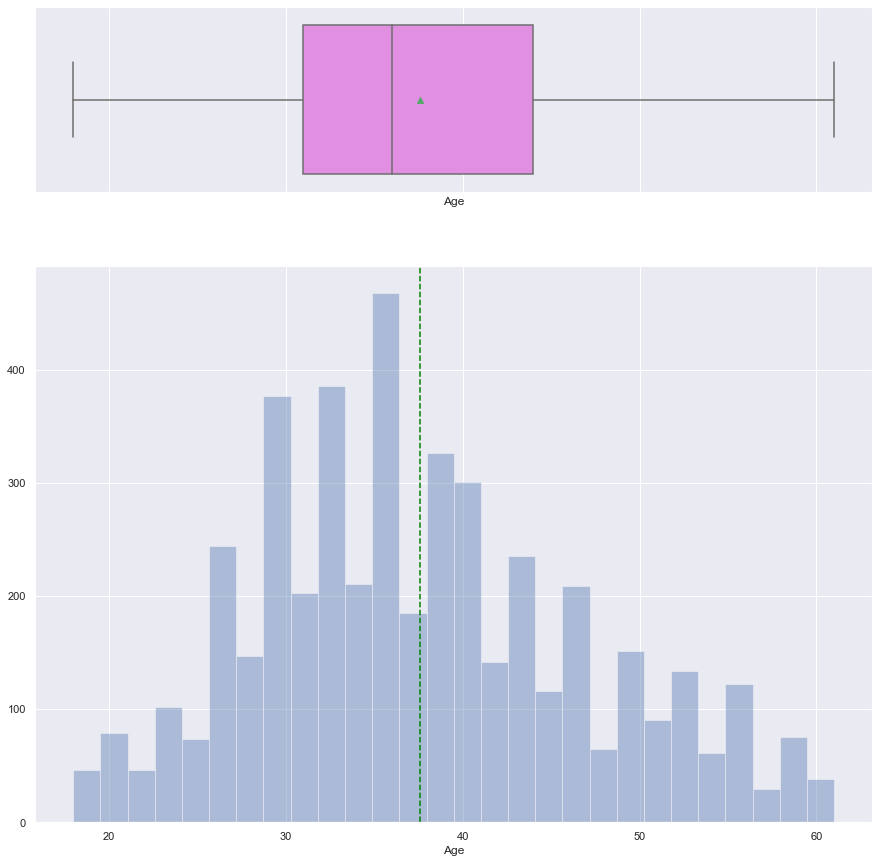


DurationOfPitch



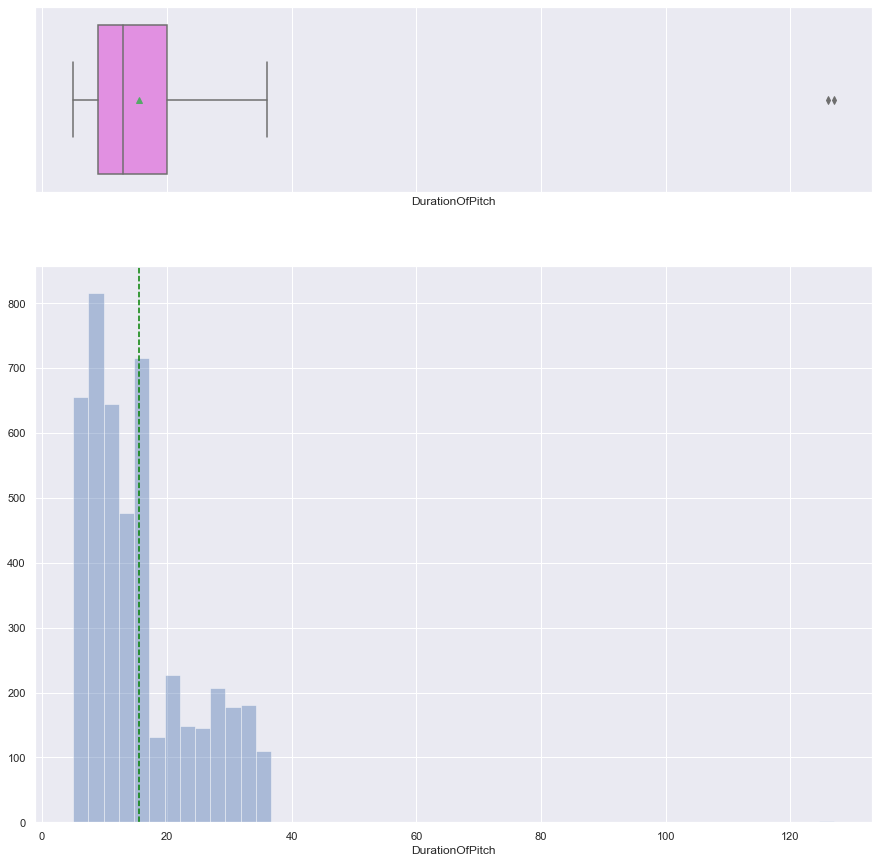

rows with duration of pitch > 40


,CustomerID,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
1434,201434,0,NaN,Company Invited,3,126.0,Salaried,Male,2,3.0,Multi,3.0,Married,3.0,0,1,1,1.0,Executive,18482.0
3878,203878,0,53.0,Company Invited,3,127.0,Salaried,Male,3,4.0,Multi,3.0,Married,4.0,0,1,1,2.0,Executive,22160.0



MonthlyIncome



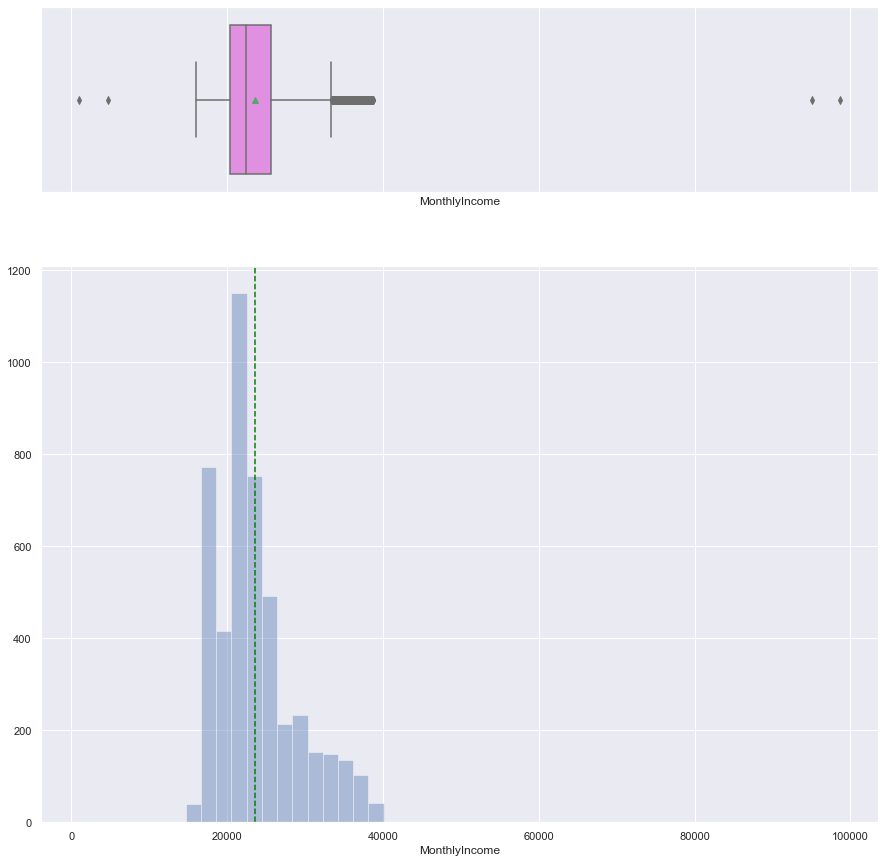

Rows with Monthly Incomeb above 40K or below 12K 


,CustomerID,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
38,200038,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Multi,NaN,Divorced,1.0,1,2,1,0.0,Executive,95000.0
142,200142,0,38.0,Self Enquiry,1,9.0,Large Business,Female,2,3.0,Super Deluxe,3.0,Single,4.0,1,5,0,0.0,Manager,1000.0
2482,202482,0,37.0,Self Enquiry,1,12.0,Salaried,Female,3,5.0,Multi,5.0,Divorced,2.0,1,2,1,1.0,Executive,98678.0
2586,202586,0,39.0,Self Enquiry,1,10.0,Large Business,Female,3,4.0,Super Deluxe,3.0,Single,5.0,1,5,0,1.0,Manager,4678.0



NumberOfTrips



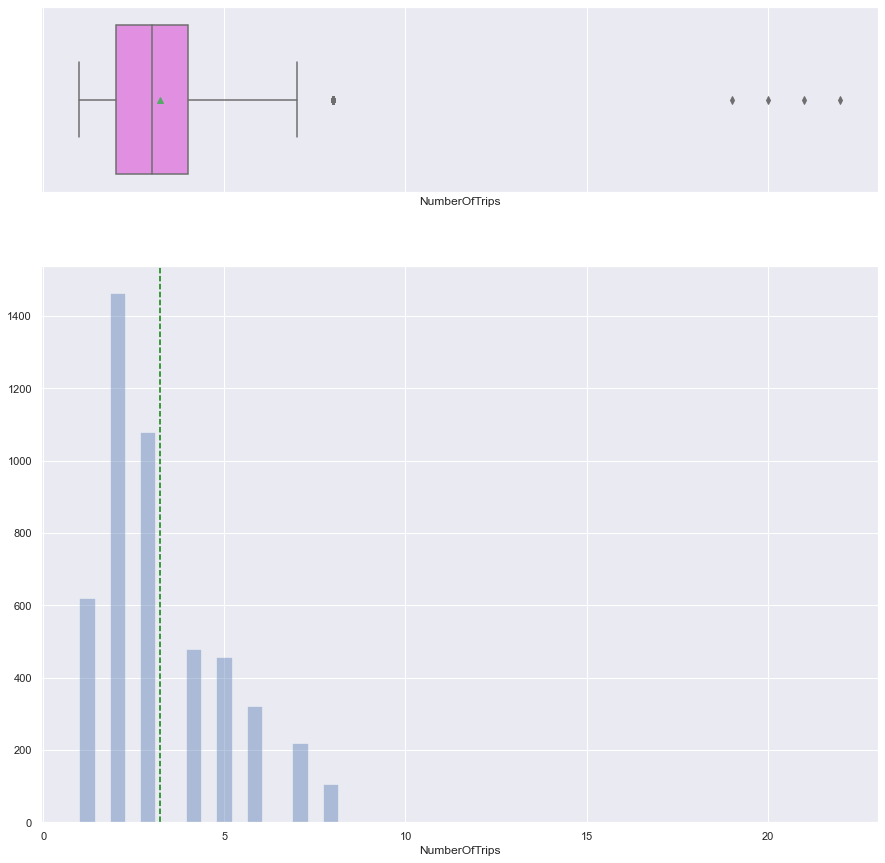

2.0     0.308340
3.0     0.227254
1.0     0.130581
4.0     0.100674
5.0     0.096462
6.0     0.067818
7.0     0.045914
8.0     0.022115
20.0    0.000211
19.0    0.000211
22.0    0.000211
21.0    0.000211
Name: NumberOfTrips, dtype: float64

In [70]:
histogram_boxplot(data['Age'])

## Duration of Pitch
histogram_boxplot(data['DurationOfPitch'])
print("rows with duration of pitch > 40")
display(data[data['DurationOfPitch']>40])

## Monthly Income
histogram_boxplot(data['MonthlyIncome'])
print("Rows with Monthly Incomeb above 40K or below 12K ")
display(data[(data.MonthlyIncome>40000) | (data.MonthlyIncome<12000)])

histogram_boxplot(data['NumberOfTrips'])
display(data.NumberOfTrips.value_counts(normalize=True))

#### Age
- Age distribution looks approximately normally distributed.
- The boxplot for age column confirms that there are no outliers for this variable
- Age can be an important variable while targeting customers for tourism package. We will further explore this in bivariate analysis.

#### Duration of Pitch
- The distribution for duration of pitch is right skewed.
- Duration of the pitch for most of the customers is less than 20 minutes.
- There are some observations which can be considered as outliers as they are very far form the upper whisker in the boxplot. Let's check how many such extreme values are there.

#### Monthly Income
- The distribution for monthly income shows that most the values lies between 20,000 to 40,000.
- Income is on of the important factors to consider while approaching a customers with a certain package. We can explore this further in bivariate analysis. 
- There are some observation on the left and some observation on the right of the boxplot which can be considered as outliers. Let's check how many such extreme values are there. 

#### Number of Trips
- The distribution for number of trips is right skewed 
- Boxplot shows that number of trips has some outliers at the right end. Let's check how many such extreme values are there. 
- We can see that most the customers i.e. 52% have taken 2 or 3 number of trips.
- As expected, with the increase in the number of trips the percentage of customers is decreasing.
- The percentage of categories 19 or above is very less. We can consider these values as outliers.
- We can see that there are just four observations with number of trips 19 or greater

### Bar Plots


NumberOfPersonVisited



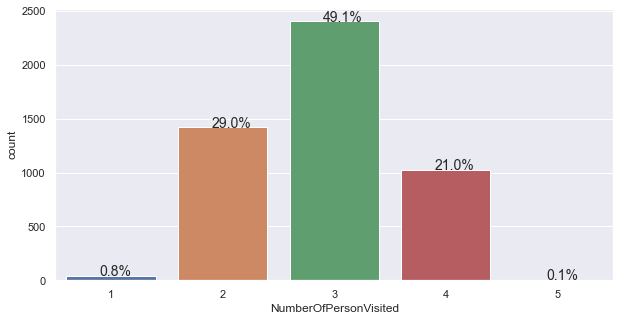


Occupation



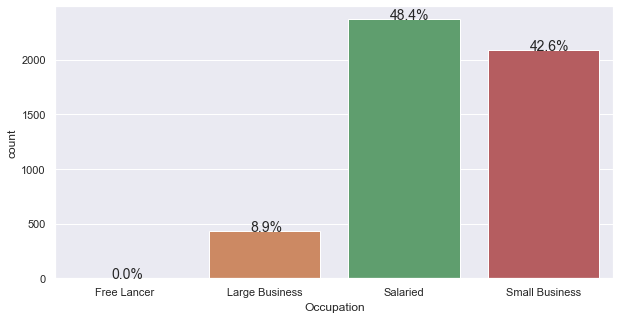


CityTier



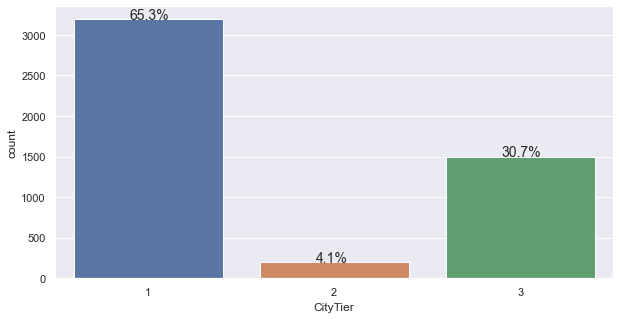


Gender



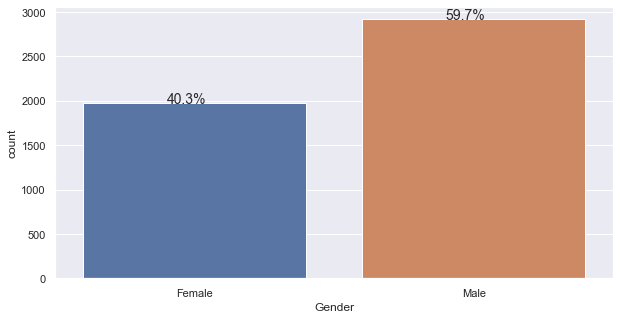


NumberOfFollowups



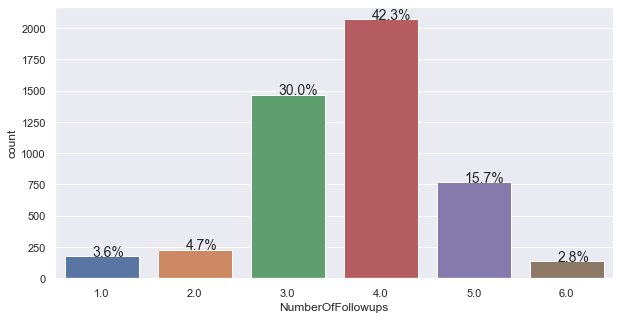


ProductPitched



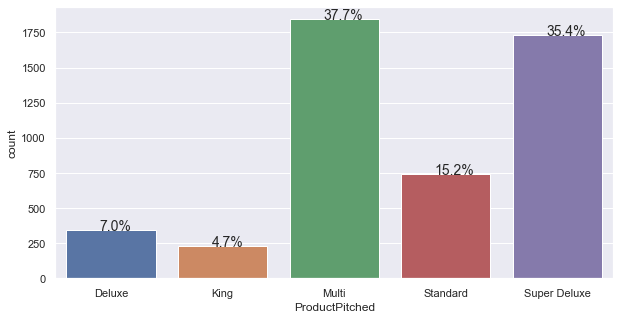


PreferredPropertyStar



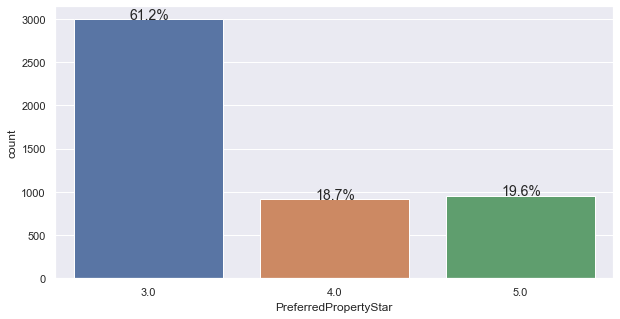


MaritalStatus



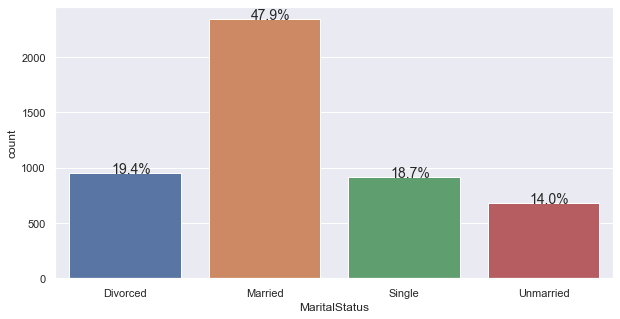


Passport



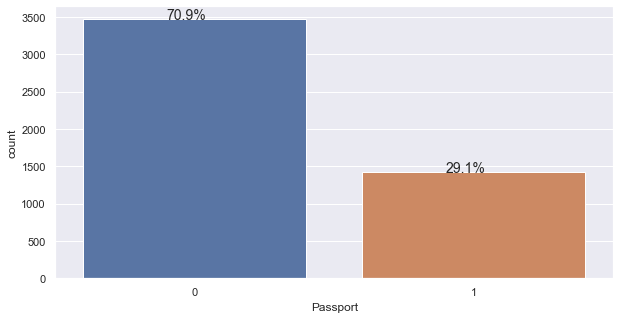


PitchSatisfactionScore



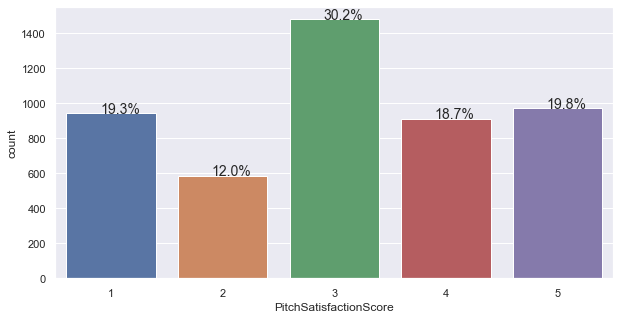


Designation



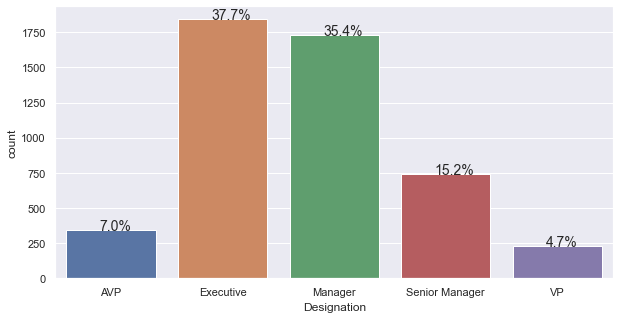


NumberOfChildrenVisited



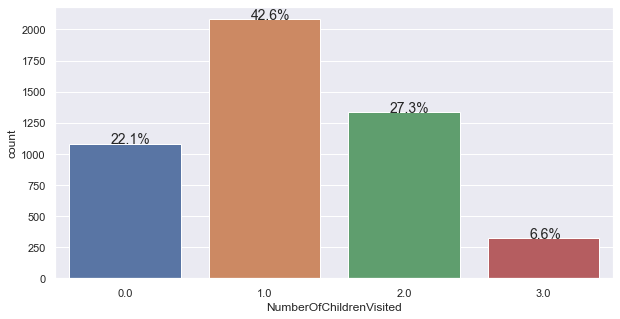


ProdTaken



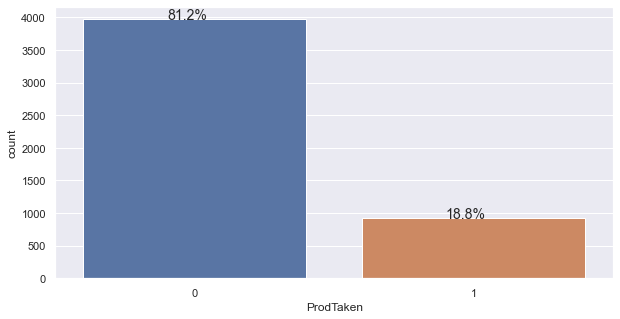

In [15]:
for i in ['NumberOfPersonVisited','Occupation','CityTier','Gender','NumberOfFollowups','ProductPitched',
          'PreferredPropertyStar', 'MaritalStatus','Passport','PitchSatisfactionScore',
          'Designation','NumberOfChildrenVisited','ProdTaken']:
    perc_on_bar(data[i]) 

#### number of persons visited
- Most customers have 3 persons who visited with them. This can be because most people like to travel with family.
- As mentioned earlier, there are just 3 observations where number of persons visited with the customer are 5 i.e. 0.1%.

#### Occupation
- Majority of customers i.e. 91% are either salaried or owns a small business. 
- As mentioned earlier, free lancer category have only 2 observations.

#### City Tier
- Most of the customers i.e. approx 65% are from tier 1 cities. This can be because of better living standards and exposure as compared to tier 2 and tier 3 cities.
- Surprisingly, tier 3 cities have much higher count than tier 2 cities. This can be because the company have less marketing in tier 2 cities.

#### Gender
- Male customers are more than the number of female customers
- There are approx 60% male customers as compared to 40% female customers
- This might be because males do the booking/inquiry when traveling with females which implies that males are the direct customers of the company.

#### Follow Ups
- We can see that company usually follows up with 3 or 4 times with their customers
- We can explore this further and observe which number of follow ups have more customers who buys the product.

#### Product Pitched
- The company pitches Deluxe or Basic packages to their customers more than the other packages. 
- This might be because the company makes more profit from Deluxe or Basic packages or these packages are less expensive, so preferred by majority of the customers.

#### Property Star
- Approx 61% customers prefer the three star property.
- Approx 39% customers prefer 4 or 5 star properties. These can be the high income customers with high income.

#### Marital Status
- Approx half of the customer base of the company is from the married people. 
- This might be because company offers more couple friendly or family packages.

#### Passport
- Most of the customers i.e. approx 71% do not have a passport
- Company can provide services to help customers with getting new or renewing their passport as most of the customers do not have passport

#### Pitch Satisfaction 
- Average i.e. 3 is the most common pitch satisfaction score given by customers.
- We can explore this further and observe which satisfaction score have more customers who actually buy the product.

#### Designation
- Approx 73% of the customers are at executive or manager level.
- We can see that the higher the position, the lesser number of observations which makes sense as executives/managers are more common than AVP/VP. 

#### Number of Children Visited
- Approx 78% customers visit with their children and approx 34% of them have more than 1 child with them.
- 22% customers visit without children. These may be the single/unmarried customers or recently married.

#### Product Taken
- This plot shows the distribution of both classes in the target variable is `imbalanced`.
- We only have approx 19% customers who have purchased the product.

## Bivariate Analysis

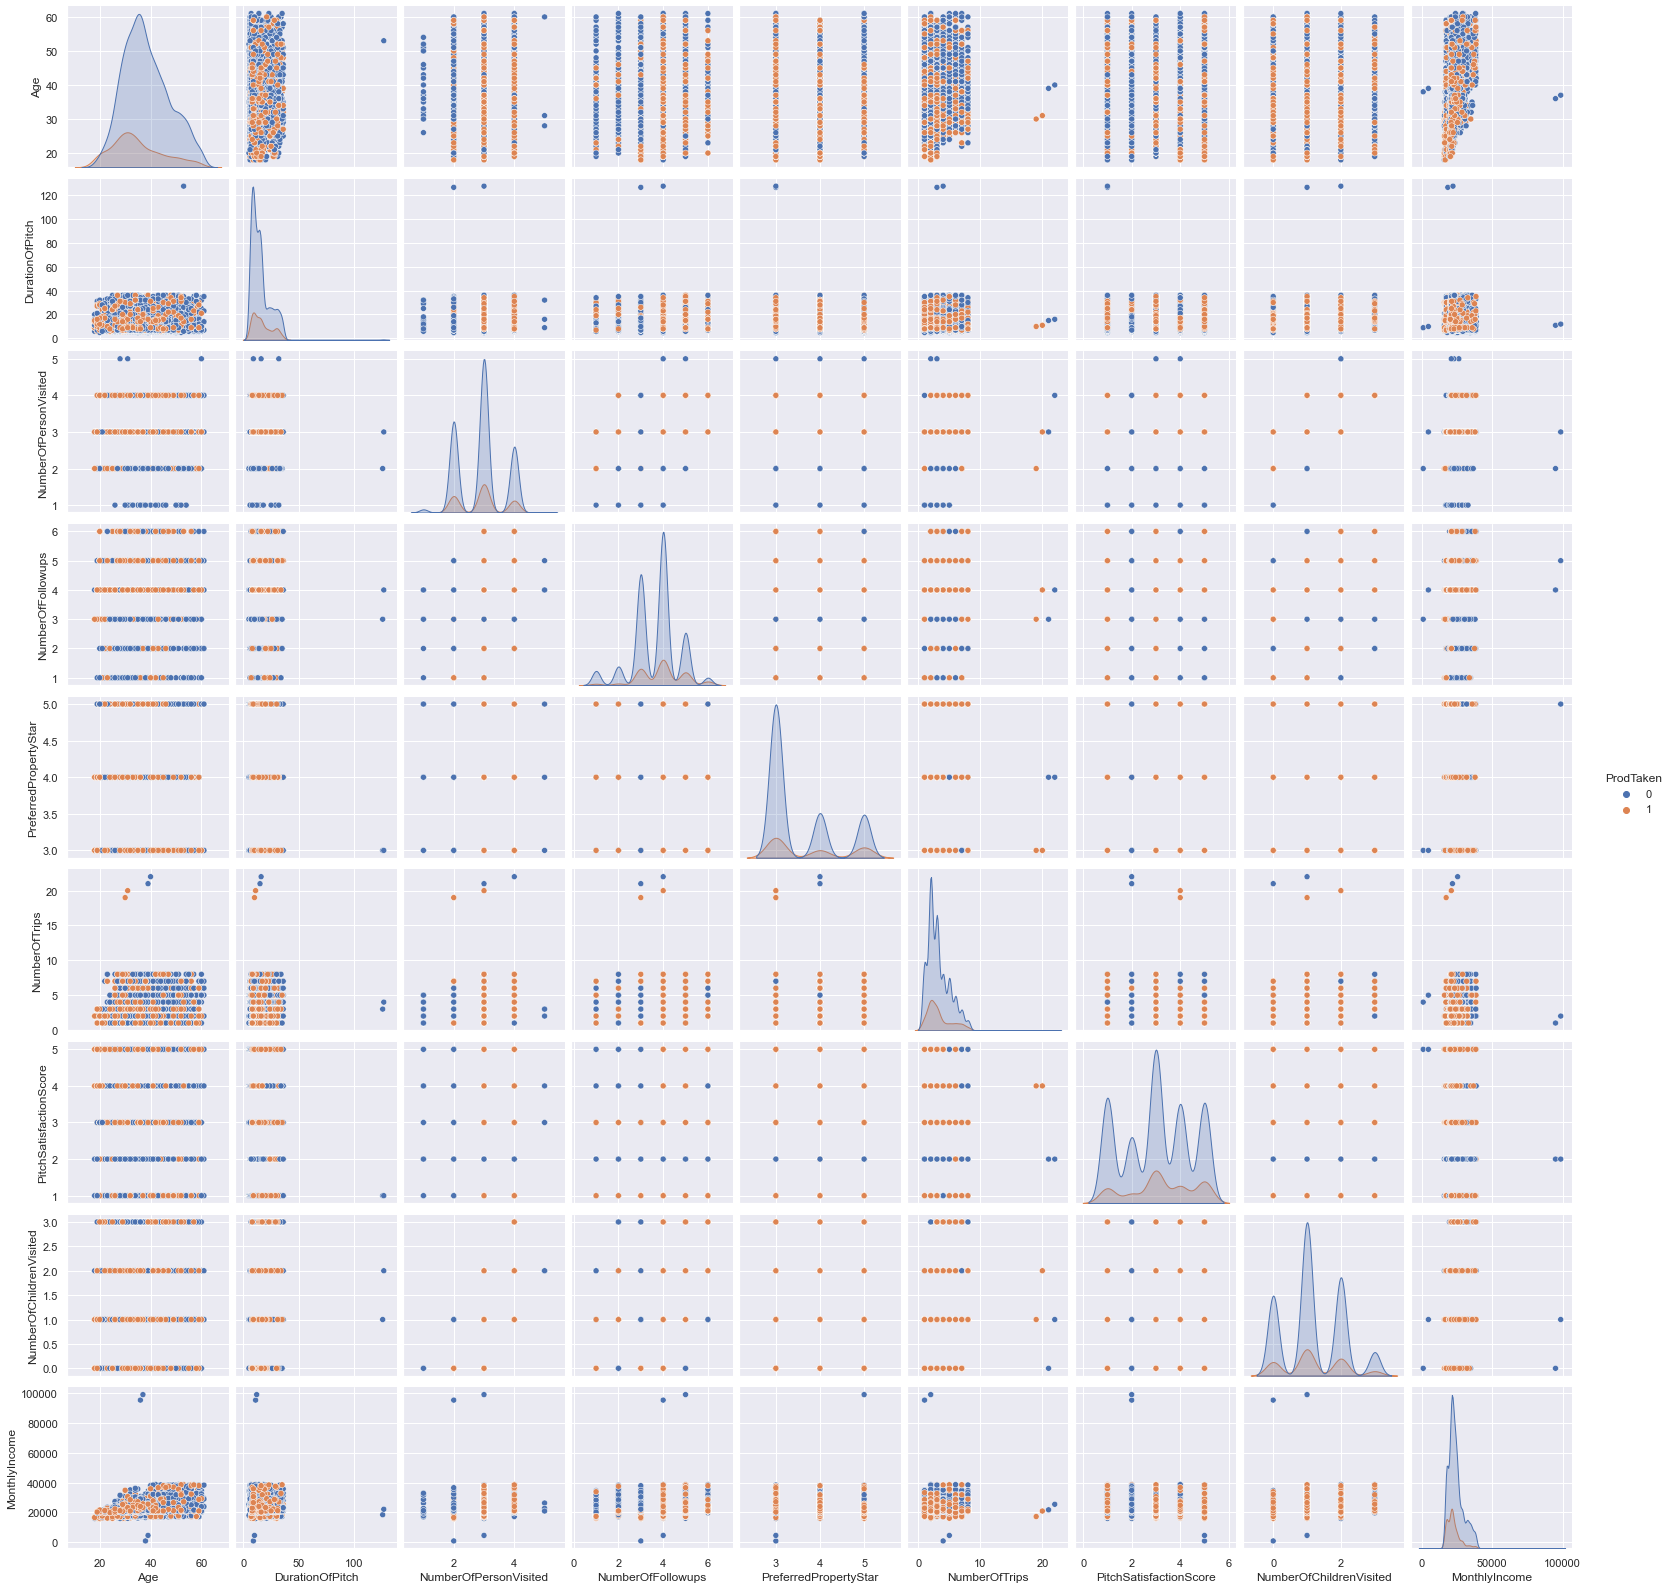

In [16]:
sns.pairplot(data=data,hue='ProdTaken')

- There are overlaps i.e. no clear distinction in the distribution of variables for people who have taken the product and did not take the product.
- Let's explore this further with the help of other plots.

#### Stacked Plots


NumberOfPersonVisited

ProdTaken                 0    1   All
NumberOfPersonVisited                 
1                        39    0    39
2                      1151  267  1418
3                      1942  460  2402
4                       833  193  1026
5                         3    0     3
All                    3968  920  4888
------------------------------------------------------------------------------------------------------------------------


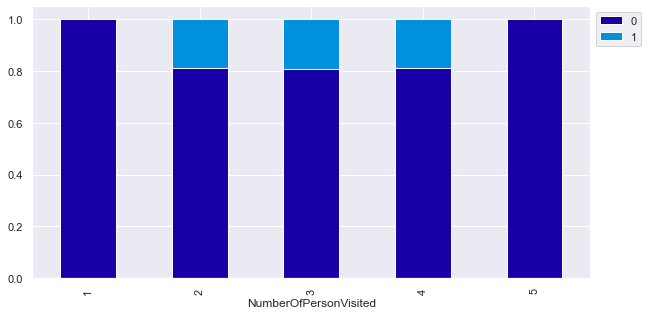


NumberOfFollowups

ProdTaken             0    1   All
NumberOfFollowups                 
1.0                 156   20   176
2.0                 205   24   229
3.0                1222  244  1466
4.0                1689  379  2068
5.0                 577  191   768
6.0                  82   54   136
All                3931  912  4843
------------------------------------------------------------------------------------------------------------------------


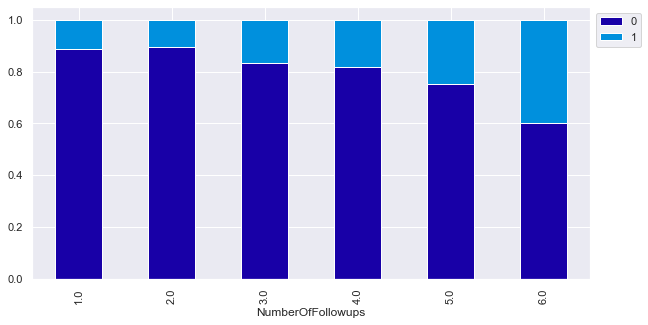


Occupation

ProdTaken          0    1   All
Occupation                     
Free Lancer        0    2     2
Large Business   314  120   434
Salaried        1954  414  2368
Small Business  1700  384  2084
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


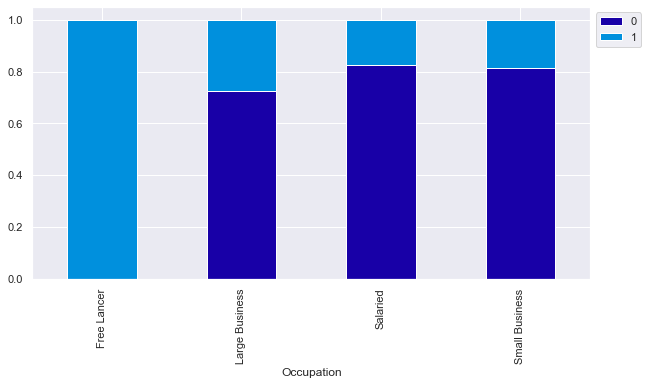


CityTier

ProdTaken     0    1   All
CityTier                  
1          2670  520  3190
2           152   46   198
3          1146  354  1500
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


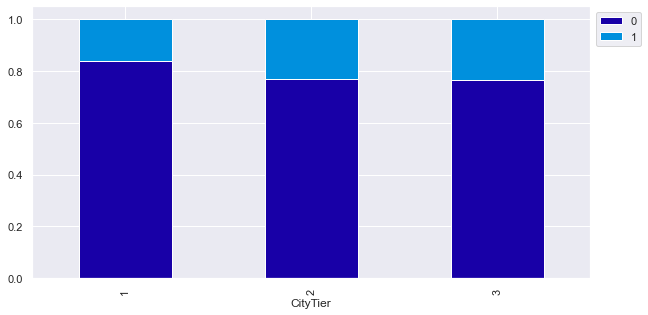


Gender

ProdTaken     0    1   All
Gender                    
Female     1630  342  1972
Male       2338  578  2916
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


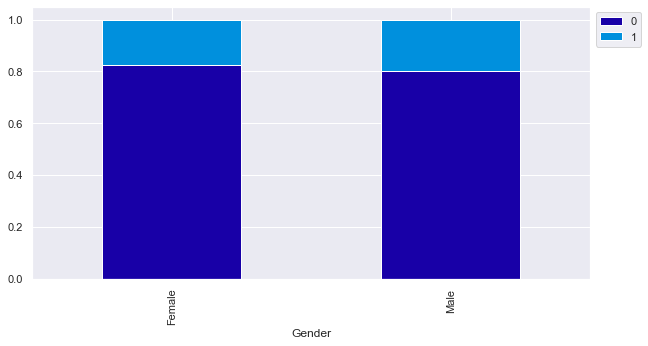


NumberOfFollowups

ProdTaken             0    1   All
NumberOfFollowups                 
1.0                 156   20   176
2.0                 205   24   229
3.0                1222  244  1466
4.0                1689  379  2068
5.0                 577  191   768
6.0                  82   54   136
All                3931  912  4843
------------------------------------------------------------------------------------------------------------------------


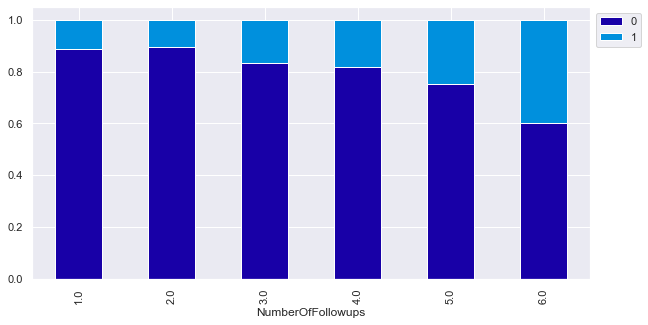


ProductPitched

ProdTaken          0    1   All
ProductPitched                 
Deluxe           322   20   342
King             210   20   230
Multi           1290  552  1842
Standard         618  124   742
Super Deluxe    1528  204  1732
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


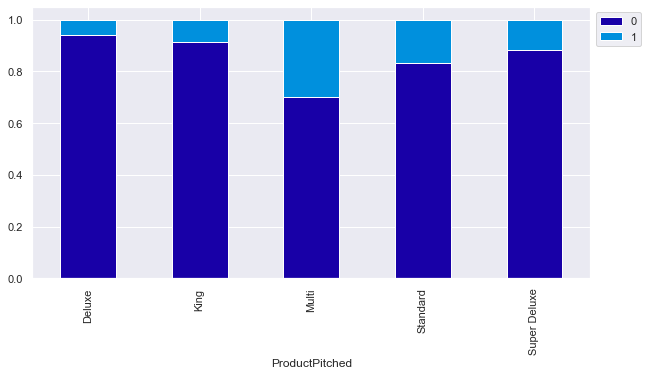


PreferredPropertyStar

ProdTaken                 0    1   All
PreferredPropertyStar                 
3.0                    2511  482  2993
4.0                     731  182   913
5.0                     706  250   956
All                    3948  914  4862
------------------------------------------------------------------------------------------------------------------------


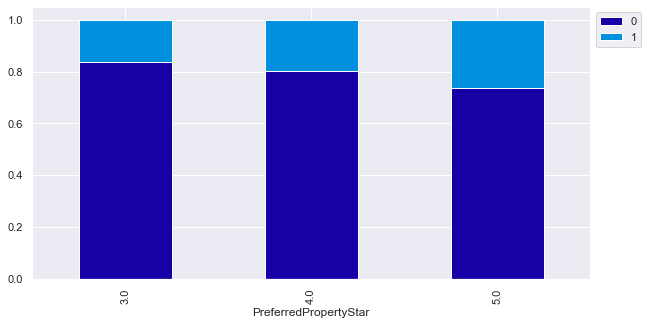


MaritalStatus

ProdTaken         0    1   All
MaritalStatus                 
Divorced        826  124   950
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
All            3968  920  4888
------------------------------------------------------------------------------------------------------------------------


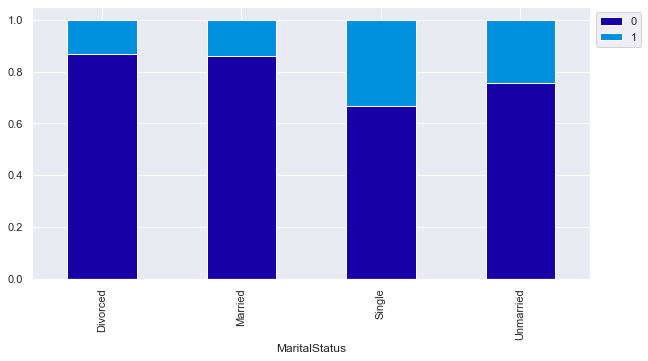


Passport

ProdTaken     0    1   All
Passport                  
0          3040  426  3466
1           928  494  1422
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


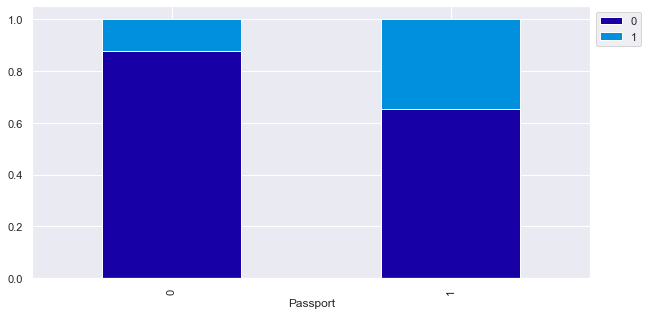


Designation

ProdTaken          0    1   All
Designation                    
AVP              322   20   342
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
VP               210   20   230
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


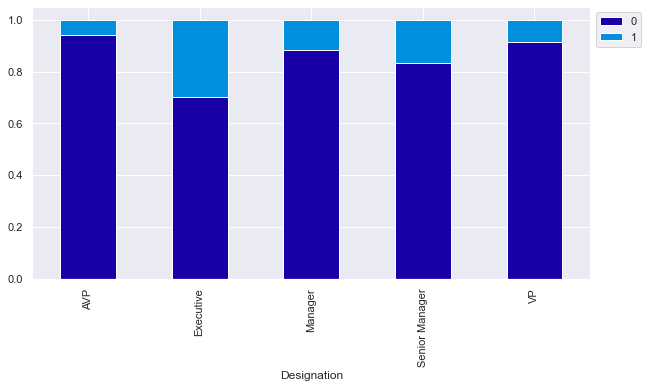

In [17]:
for i in ['NumberOfPersonVisited','NumberOfFollowups','Occupation','CityTier','Gender','NumberOfFollowups','ProductPitched',
          'PreferredPropertyStar', 'MaritalStatus','Passport','Designation']:
    stacked_plot(data[i])

### Prod Taken vs Number of Persons Visited
- The plot shows that the conversion rate is high when number of persons are more than 1.
- This might be because company is not providing good solo packages.
- Conversion rate is zero when number of persons visited is 5. However, there are just 3 such observations so cannot give any conclusive insights.

### Prod Taken vs Number of Follow ups

- We saw earlier that company usually follows up with 3 or 4 times but this plots shows that as number of follow ups increases, conversion rate for customers increases.
- Salesperson should ensure to follow up with the customers who are interested in buying the product.

### Prod Taken vs Occupation

- The conversion rate for large business owners is higher than salaried or small business owners. 
- This might be because large business owner have high income.
- Free lancer have 100% conversion rate but there are just 2 such observation, so cannot give any conclusive insights.

### Prod Taken vs Marital Status

- We have seen that married people are most common customer for the company but this graph shows that the conversion rate is higher for single and unmarried customers as compared to the married customers.
- Company can target single and unmarried customers more and can modify packages as per these customers.

### Prod Taken vs Passport

- The conversion rate for customers with passport is higher as compared to the customers without passport.
- The company should customize more international packages to attract more such customers.

### Prod Taken vs Product Pitched

- The conversion rate of customers is higher if the product pitched is Basic. This might be because basic package is less expensive. 
- We saw earlier that company pitches deluxe package more than the standard package, but standard package shows higher conversion rate than deluxe package. The company can pitch standard package more often.

### Prod Taken vs Designation

- The conversion rate of executives is higher than other designations.
- Customers at VP and AVP positions have the least conversion rate.

### Prod Taken vs Duration of Pitch

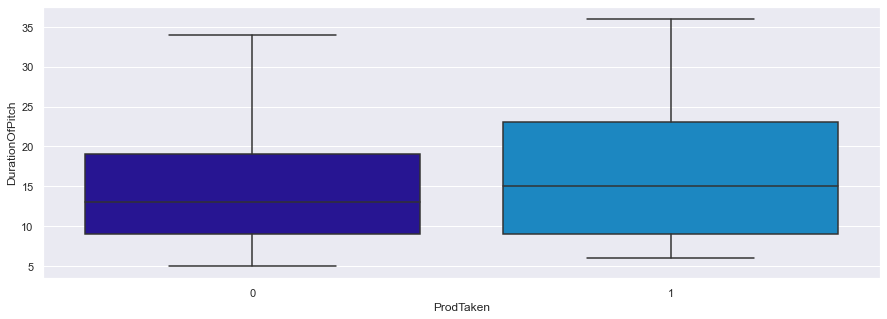

In [18]:
plt.figure(figsize=(15,5))
#sns.boxplot(y='DurationOfPitch',x='ProdTaken',data=data)
sns.boxplot(y='DurationOfPitch',x='ProdTaken',data=data, showfliers=False)
plt.show()

- We can clearly see that customers who purchased a package have longer duration of pitch.
- Company sales person should give more time while pitching a certain package and convey relevant information to the customer  

### Prod Taken vs Monthly Income

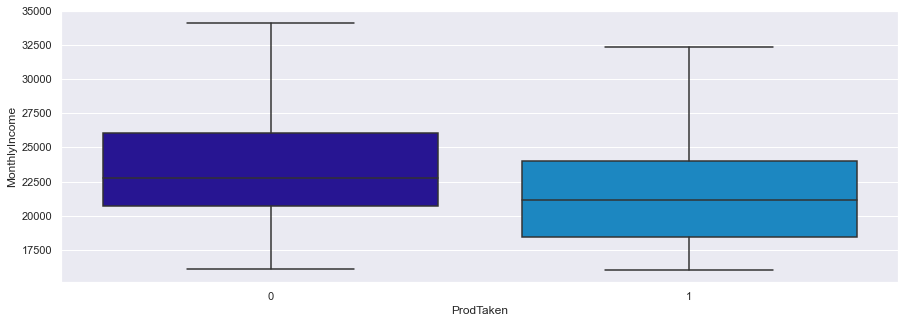

In [19]:
plt.figure(figsize=(15,5))
sns.boxplot(y='MonthlyIncome',x='ProdTaken',data=data, showfliers=False)
plt.show()

- The distribution looks right skewed for class 0 as well as class 1 which can be expected. 
- Customers who purchased a package have lower median income than customers who did not purchase a package. This might be because of our earlier observation that executives are more likely to purchase a package.
- Let's check this by adding the variable 'Designation' to this plot.

### Prod Taken vs Monthly Income vs Designation 

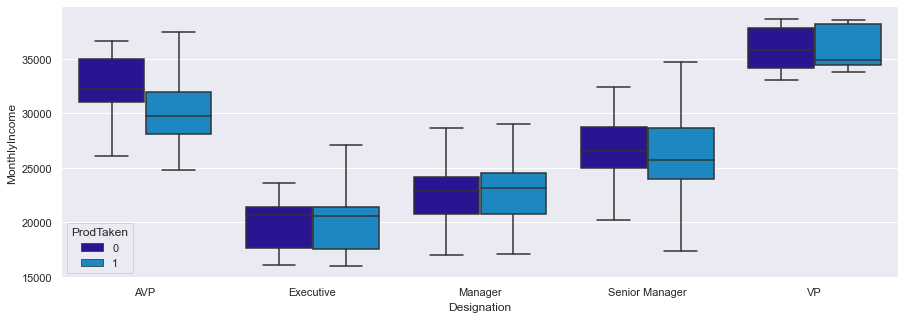

In [20]:
plt.figure(figsize=(15,5))
#sns.boxplot(y='MonthlyIncome',x='Designation',hue='ProdTaken',data=data)
sns.boxplot(y='MonthlyIncome',x='Designation',hue='ProdTaken',data=data, showfliers=False)
plt.show()

- As expected, higher the position higher the monthly income of the customer.
- Not much difference in the income of customers at executive or manager level who did/did not purchase a package. There are many outliers for customers who purchased a package. 
- Customers at VP or AVP positions who purchases a package have slightly lower median income.

### Prod Taken vs Age

<AxesSubplot:xlabel='Age', ylabel='ProdTaken'>

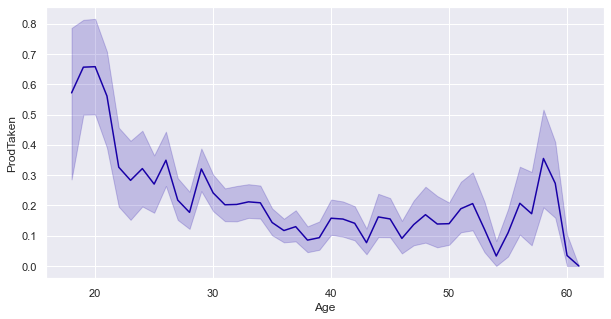

In [21]:
sns.lineplot(x='Age',y='ProdTaken',data=data)

- This plot shows that younger people are more likely to take the product as compared to middle aged or old people.
- There is a small peak at the age near 60. These might be people who are retired or about to be retired. 

### Correlation Heatmap

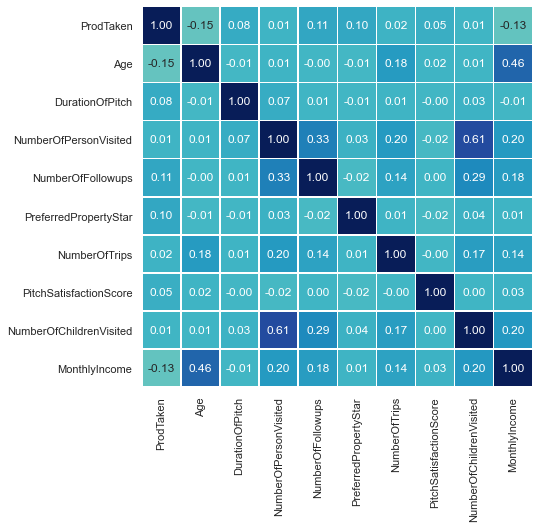

In [22]:
sns.set(rc={'figure.figsize':(7,7)})
sns.heatmap(data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu",
            fmt='0.2f')
plt.show()

- Number of trips and age have weak positive correlation, which makes sense as age increases number of trips is expected to increase.
- Age and monthly income are positively correlated.
- ProdTaken has weak negative correlation with age which agrees with our earlier observation that as age increases probability for purchasing a package decreases.  
- No other variables have high correlation among them.

## Data Cleanup

#### Drop Outliers 

In [23]:
#Dropping observaions with duration of pitch greater than 40. There are just 2 such observations
data.drop(index=data[data.DurationOfPitch>37].index,inplace=True)

#Dropping observation with monthly income less than 12000 or greater than 40000. There are just 4 such observations
data.drop(index=data[(data.MonthlyIncome>40000) | (data.MonthlyIncome<12000)].index,inplace=True)

#Dropping observations with number of trips greater than 8. There are just 4 such observations
data.drop(index=data[data.NumberOfTrips>10].index,inplace=True)

 **As our aim is to predict customers who are more likely to buy the product, we should drop columns `DurationOfPitch','NumberOfFollowups','ProductPitched','PitchSatisfactionScore'` as these columns would not be available at the time of prediction for new data.**

In [24]:
#Dropping columns
data.drop(columns=['DurationOfPitch','NumberOfFollowups','ProductPitched','PitchSatisfactionScore'], inplace=True)

#### Fill Nulls

In [25]:
## Numerics - Median
median_imputed_col=['Age', 'MonthlyIncome', 'NumberOfTrips']
for i in median_imputed_col:
    median = data[i].median()
    data[i].fillna(median, inplace = True)

In [26]:
## Numerics - Mode
mode_imputed_col=['NumberOfChildrenVisited','PreferredPropertyStar','PreferredLoginDevice']

for i in mode_imputed_col:
    
    mode = data[i].mode()[0]
    data[i].fillna(mode, inplace = True)
    


In [50]:
# convert booleans to int
data[['OwnCar','Passport']] = data[['OwnCar','Passport']].astype(int)

### Split the dataset into train and test sets

In [27]:
#Separating target variable and other variables
X=data.drop(columns='ProdTaken')
Y=data['ProdTaken']

In [28]:
#Splitting the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=1,stratify=Y)

In [29]:
#Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

Age                        0
PreferredLoginDevice       0
CityTier                   0
Occupation                 0
Gender                     0
NumberOfPersonVisited      0
PreferredPropertyStar      0
MaritalStatus              0
NumberOfTrips              0
Passport                   0
OwnCar                     0
NumberOfChildrenVisited    0
Designation                0
MonthlyIncome              0
dtype: int64
------------------------------
Age                        0
PreferredLoginDevice       0
CityTier                   0
Occupation                 0
Gender                     0
NumberOfPersonVisited      0
PreferredPropertyStar      0
MaritalStatus              0
NumberOfTrips              0
Passport                   0
OwnCar                     0
NumberOfChildrenVisited    0
Designation                0
MonthlyIncome              0
dtype: int64


**Let's create dummy variables for string type variables***

In [30]:
#List of columns to create a dummy variables
col_dummy=['PreferredLoginDevice', 'Occupation', 'Gender', 'MaritalStatus', 'Designation', 'CityTier']

In [31]:
#Encoding categorical varaibles
X_train=pd.get_dummies(X_train, columns=col_dummy, drop_first=True)
X_test=pd.get_dummies(X_test, columns=col_dummy, drop_first=True)

# Building the model

### Model evaluation criterion:

#### Model can make wrong predictions as:
1. Predicting a customer will buy the product and the customer doesn't buy - Loss of resources
2. Predicting a customer will not buy the product and the customer buys - Loss of opportunity

#### Which case is more important? 
* Predicting that customer will not buy the product but he buys i.e. losing on a potential source of income for the company because that customer will not targeted by the marketing team when he should be targeted.

#### How to reduce this loss i.e need to reduce False Negatives?
* Company wants Recall to be maximized, greater the Recall lesser the chances of false negatives.

**Let's create two functions to calculate different metrics and confusion matrix, so that we don't have to use the same code repeatedly for each model.**

In [32]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [33]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Decision Tree Classifier

Accuracy on training set :  1.0
Accuracy on test set :  0.8715846994535519
Recall on training set :  1.0
Recall on test set :  0.6413043478260869
Precision on training set :  1.0
Precision on test set :  0.6654135338345865


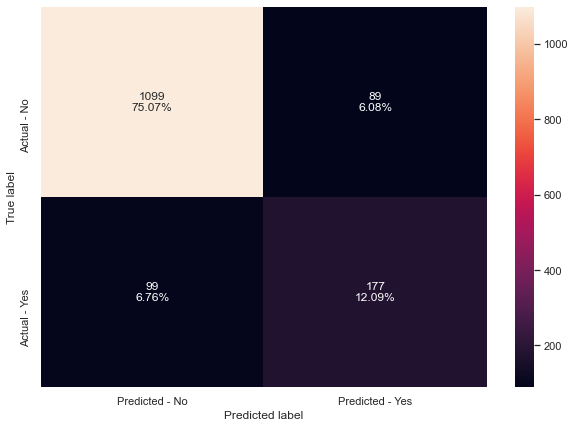

In [34]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(d_tree)

#Creating confusion matrix
make_confusion_matrix(d_tree,y_test)

- The model is overfitting the training data as training recall/precision is much higher than the test recall/precision

### Hyperparameter Tuning

In [35]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.18,1:0.81},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 0.18, 1: 0.72},
                       criterion='gini', max_depth=5, max_features=None,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       min_impurity_split=None, min_samples_leaf=10,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=1, splitter='best')

Accuracy on training set :  0.8034563561804335
Accuracy on test set :  0.7773224043715847
Recall on training set :  0.6635514018691588
Recall on test set :  0.6521739130434783
Precision on training set :  0.48354143019296253
Precision on test set :  0.43902439024390244


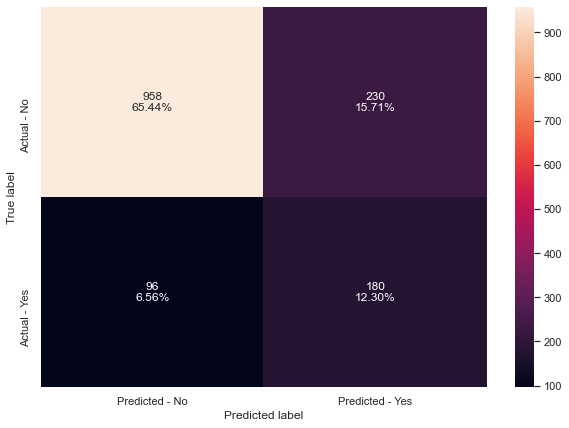

In [36]:
get_metrics_score(dtree_estimator)

make_confusion_matrix(dtree_estimator,y_test)

- The model is generalizing well and not overfitting the data
- The recall is still similar on the test data but the precision has decreased significantly.

## Random Forest Classifier

Accuracy on training set :  1.0
Accuracy on test set :  0.8934426229508197
Recall on training set :  1.0
Recall on test set :  0.5108695652173914
Precision on training set :  1.0
Precision on test set :  0.8703703703703703


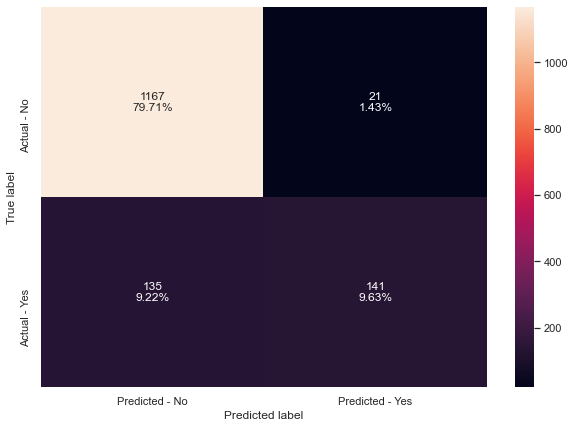

In [37]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(rf_estimator)

#Creating confusion matrix
make_confusion_matrix(rf_estimator,y_test)

- With default parameters, random forest is performing better than decision tree in terms of precision but has less recall.
- The model is overfitting the training data.
- We'll try to reduce overfitting and improve recall by hyperparameter tuning.

### Hyperparameter Tuning

In [38]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.18,1:0.82},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10)}


# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring='recall',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.18, 1: 0.82}, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=11,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=30, n_jobs=None, oob_score=True,
                       random_state=1, verbose=0, warm_start=False)

Accuracy on training set :  0.8884007029876977
Accuracy on test set :  0.8183060109289617
Recall on training set :  0.8800623052959502
Recall on test set :  0.677536231884058
Precision on training set :  0.6501726121979287
Precision on test set :  0.5137362637362637


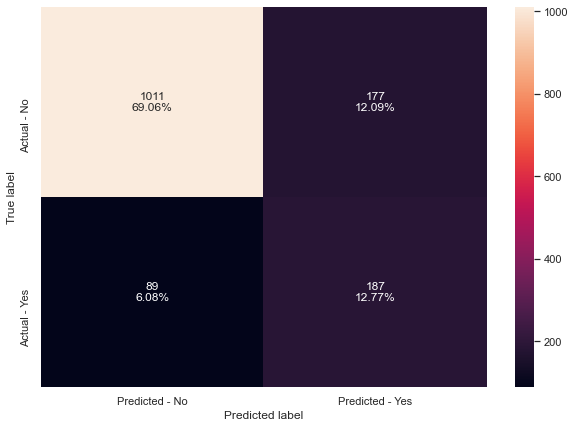

In [39]:
#Calculating different metrics
get_metrics_score(rf_tuned)

#Creating confusion matrix
make_confusion_matrix(rf_tuned,y_test)

- The overfitting has reduced after tuning the model.
- The recall has improved on the test data but the precision has decreased significantly.

## AdaBoost Classifier

Accuracy on training set :  0.8453427065026362
Accuracy on test set :  0.8422131147540983
Recall on training set :  0.29906542056074764
Recall on test set :  0.2826086956521739
Precision on training set :  0.7111111111111111
Precision on test set :  0.7027027027027027


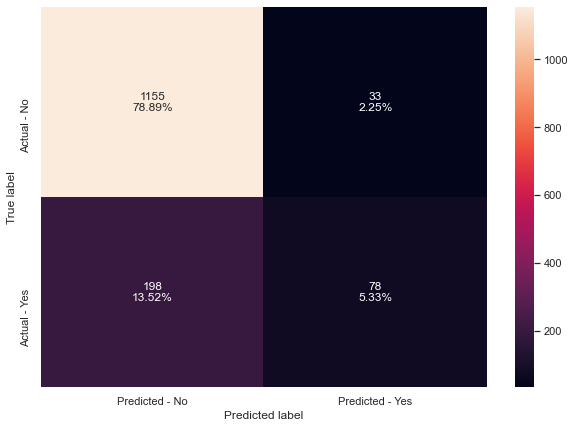

In [40]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(ab_classifier)

#Creating confusion matrix
make_confusion_matrix(ab_classifier,y_test)

- The model is not overfitting the data but is giving very low recall on training and test data.

### Hyperparameter Tuning

In [41]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

Accuracy on training set :  0.9680726420620972
Accuracy on test set :  0.8401639344262295
Recall on training set :  0.8862928348909658
Recall on test set :  0.5
Precision on training set :  0.9404958677685951
Precision on test set :  0.5897435897435898


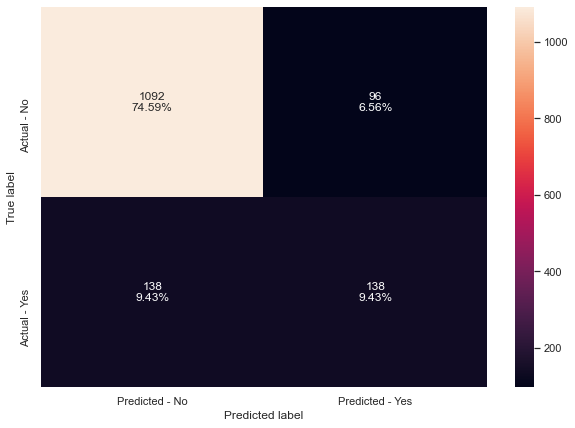

In [42]:
#Calculating different metrics
get_metrics_score(abc_tuned)

#Creating confusion matrix
make_confusion_matrix(abc_tuned,y_test)

- The train as well as test recall have improved significantly but the model is overfitting the training data now.

## Gradient Boosting Classifier

Accuracy on training set :  0.8787346221441125
Accuracy on test set :  0.8613387978142076
Recall on training set :  0.43302180685358255
Recall on test set :  0.37318840579710144
Precision on training set :  0.8475609756097561
Precision on test set :  0.7744360902255639


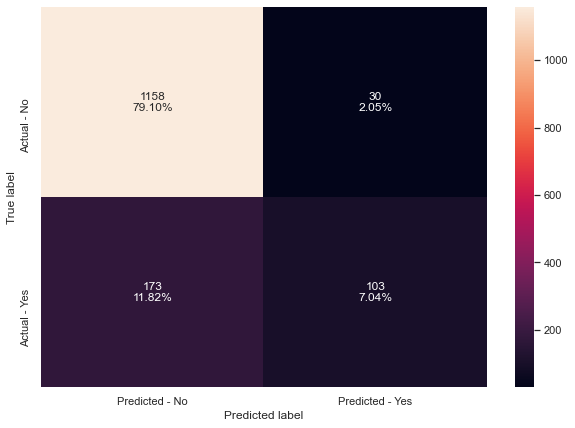

In [43]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(gb_classifier)

#Creating confusion matrix
make_confusion_matrix(gb_classifier,y_test)

- The model is not overfitting the data but is giving very low recall on training and test data.
- The recall is better as compared to AdaBoost with default parameters but still not great.

### Hyperparameter Tuning

In [44]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5, n_jobs = -1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse',
                           init=AdaBoostClassifier(algorithm='SAMME.R',
                                                   base_estimator=None,
                                                   learning_rate=1.0,
                                                   n_estimators=50,
                                                   random_state=1),
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=0.7, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=250,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
             

Accuracy on training set :  0.9147627416520211
Accuracy on test set :  0.8702185792349727
Recall on training set :  0.602803738317757
Recall on test set :  0.44565217391304346
Precision on training set :  0.9148936170212766
Precision on test set :  0.76875


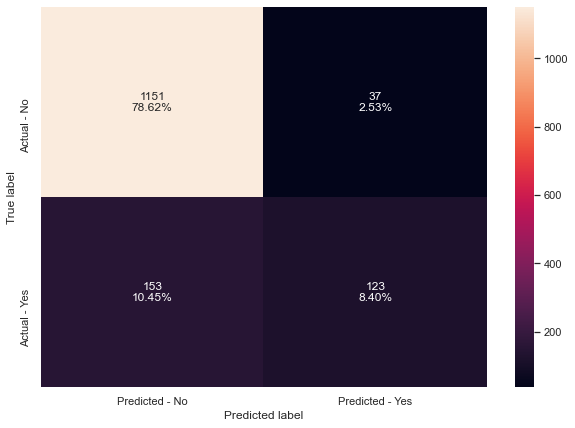

In [45]:
#Calculating different metrics
get_metrics_score(gbc_tuned)

#Creating confusion matrix
make_confusion_matrix(gbc_tuned,y_test)

- The model is not overfitting the data but the performance has not improved by much after hyperparameter tuning.
- The test precision has decreased slightly and the test recall has increased slightly but still very low. 

## XGBoost Classifier

[09:26:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy on training set :  0.9935559461042766
Accuracy on test set :  0.8934426229508197
Recall on training set :  0.9657320872274143
Recall on test set :  0.5615942028985508
Precision on training set :  1.0
Precision on test set :  0.8157894736842105


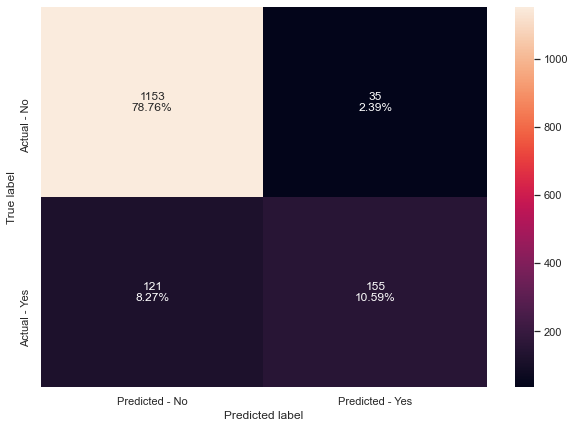

In [53]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1)
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(xgb_classifier)

#Creating confusion matrix
make_confusion_matrix(xgb_classifier,y_test)

- With default parameters, the model is overfitting the training data.
- The model is not able to correctly identify potential customers i.e. the test recall is very low.

### Hyperparameter Tuning

In [57]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5, n_jobs = -1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_


# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

[09:59:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=1, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=5, subsample=0.9,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

Accuracy on training set :  0.7656707674282367
Accuracy on test set :  0.7056010928961749
Recall on training set :  0.8629283489096573
Recall on test set :  0.7862318840579711
Precision on training set :  0.43759873617693523
Precision on test set :  0.3684210526315789


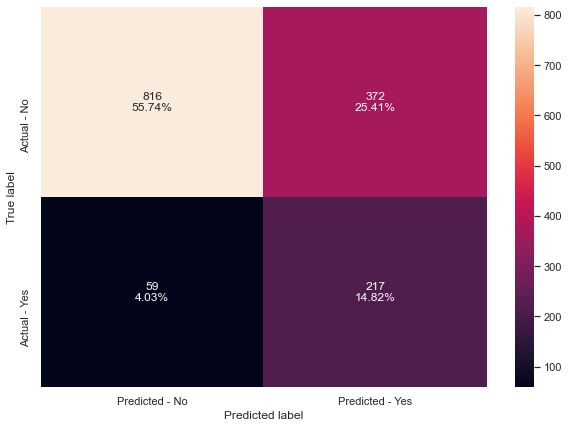

In [58]:
#Calculating different metrics
get_metrics_score(xgb_tuned)

#Creating confusion matrix
make_confusion_matrix(xgb_tuned,y_test)

- The overfitting has reduced after hyperparameter tuning
- Tuned xgboost model is giving the highest recall yet among all the model we built.
- Let's try one more model - Stacking classifier.

## Stacking Classifier

- Stacking classifier stacks the output of individual estimators and use a classifier to compute the final prediction
- Stacking allows to use the strength of each individual estimator by using their output as input of a final estimator

In [59]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

[10:01:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


StackingClassifier(cv=None,
                   estimators=[('Random Forest',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight={0: 0.18,
                                                                     1: 0.82},
                                                       criterion='gini',
                                                       max_depth=15,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=11,
                      

Accuracy on training set :  0.8509080257762156
Accuracy on test set :  0.7780054644808743
Recall on training set :  0.9174454828660437
Recall on test set :  0.7463768115942029
Precision on training set :  0.5636363636363636
Precision on test set :  0.44685466377440347


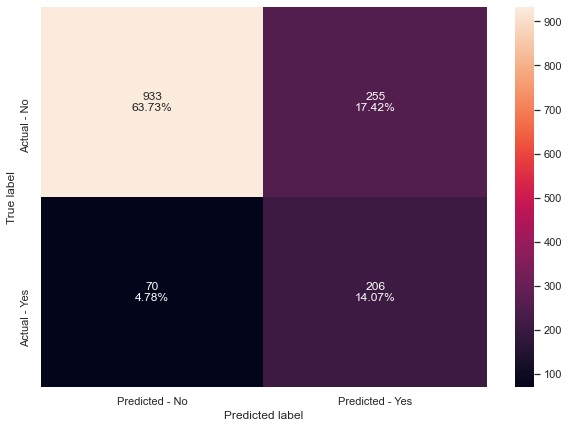

In [60]:
#Calculating different metrics
get_metrics_score(stacking_classifier)

#Creating confusion matrix
make_confusion_matrix(stacking_classifier,y_test)

- No increase compared to XG Boost
- Model is slightly overfitting the training data.

## Comparing all models

In [61]:
# defining list of models
models = [d_tree, dtree_estimator,rf_estimator, rf_tuned, ab_classifier, abc_tuned, gb_classifier, gbc_tuned, xgb_classifier,xgb_tuned, stacking_classifier]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [63]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Random Forest','Tuned Random Forest',
                                         'AdaBoost Classifier','Tuned AdaBoost Classifier',
                                          'Gradient Boosting Classifier', 'Tuned Gradient Boosting Classifier',
                                          'XGBoost Classifier',  'Tuned XGBoost Classifier', 'Stacking Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_Recall',ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
9,Tuned XGBoost Classifier,0.765671,0.705601,0.862928,0.786232,0.437599,0.368421
10,Stacking Classifier,0.850908,0.778005,0.917445,0.746377,0.563636,0.446855
3,Tuned Random Forest,0.888401,0.818306,0.880062,0.677536,0.650173,0.513736
1,Tuned Decision Tree,0.803456,0.777322,0.663551,0.652174,0.483541,0.439024
0,Decision Tree,1.000000,0.871585,1.000000,0.641304,1.000000,0.665414
8,XGBoost Classifier,0.993556,0.893443,0.965732,0.561594,1.000000,0.815789
2,Random Forest,1.000000,0.893443,1.000000,0.510870,1.000000,0.870370
5,Tuned AdaBoost Classifier,0.968073,0.840164,0.886293,0.500000,0.940496,0.589744
7,Tuned Gradient Boosting Classifier,0.914763,0.870219,0.602804,0.445652,0.914894,0.768750
6,Gradient Boosting Classifier,0.878735,0.861339,0.433022,0.373188,0.847561,0.774436


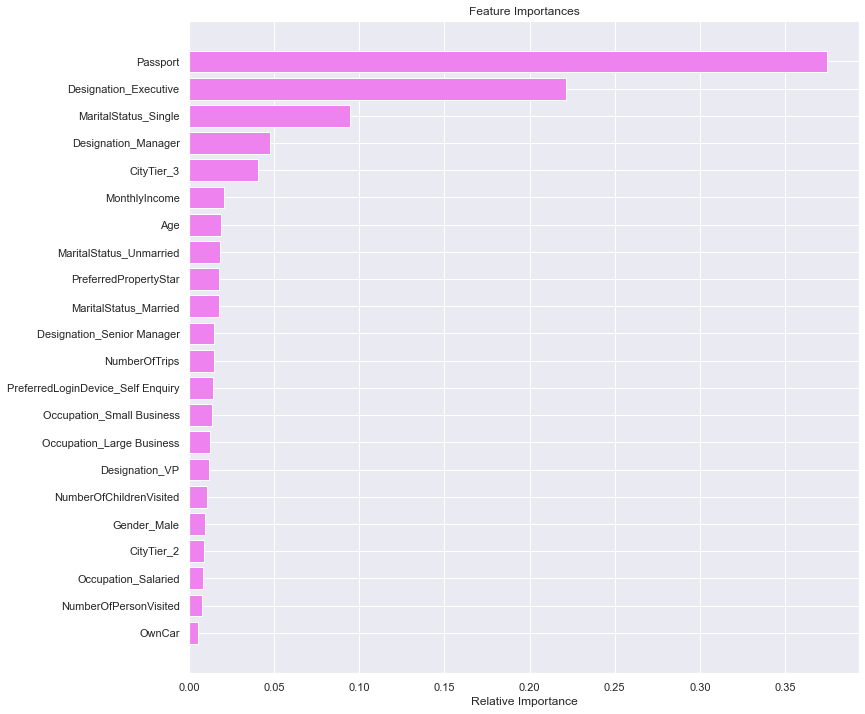

In [64]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


- Passport is the most important feature, followed by designation and city tier, as per the tuned xgboost model.

# Business Recommendations

- Our analysis shows that very few customers have passports and they are more likely to purchase the travel package. The company should customize more international packages to attract more such customers.
- We have customers from tier 1 and tier 3 cities but very few form tier 2 cities. Company should expand its marketing strategies to increase the number of customers from tier 2 cities.
- We saw in our analysis that people with higher income or at high positions like AVP or VP are less likely to buy the product. The company can offer short term travel packages and customize the package for higher income customers with added luxuries to target such customers.
- When implementing a marketing strategy, external factors, such as the number of follow ups, time of calling, should also be carefully considered as our analysis shows that the customers who have been followed up more are the one's buying the package.
- After we identify a potential customer, the company should pitch packages as per the customer's monthly income, for example, do not pitch king packages to a customer with low income and such packages can be pitched more to the higher income customers.
- We saw in our analysis that young and single people are more likely to buy the offered packages. The company can offer discounts or customize the package to attract more couples, families, and customers above 30 years of age.